In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
df = pd.read_csv('NVDA.csv') 
df.tail() # to print the last 5 days of stock market

,Date,Open,High,Low,Close,Adj Close,Volume
60,2022-11-15,167.220001,169.979996,163.820007,166.660004,166.660004,54587600
61,2022-11-16,161.619995,163.619995,158.729996,159.100006,159.100006,64954700
62,2022-11-17,157.149994,162.660004,155.350006,156.770004,156.770004,71089400
63,2022-11-18,159.660004,160.020004,151.199997,154.089996,154.089996,49167700
64,2022-11-21,151.470001,154.770004,150.800003,153.169998,153.169998,40473900


In [210]:
df.shape

(65, 7)

In [211]:
df.isnull().sum() # there are no emply or null data to clean 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [212]:
palette = ['#66CDAE', '#8F3751', '#3E757F', '#D2345B', '#EF794A']

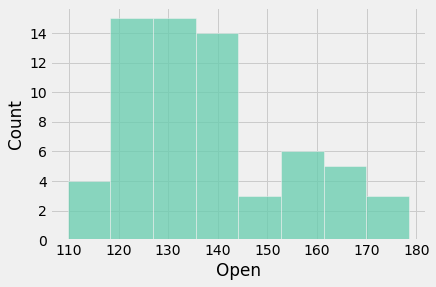

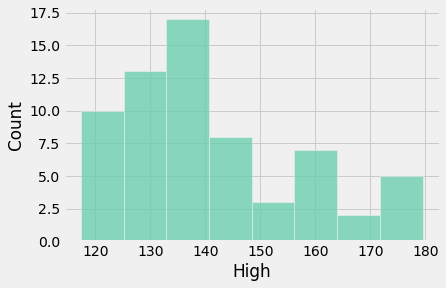

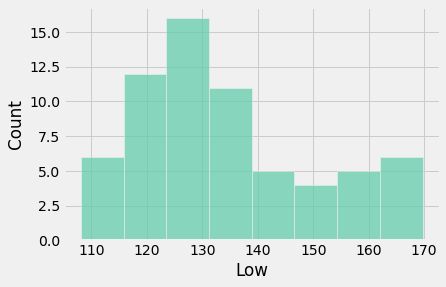

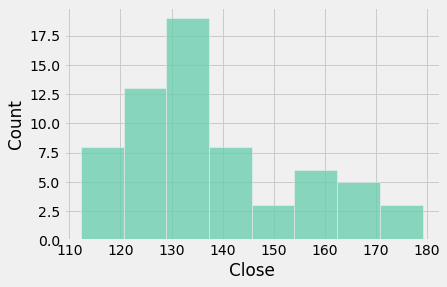

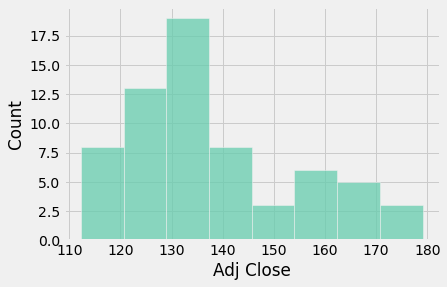

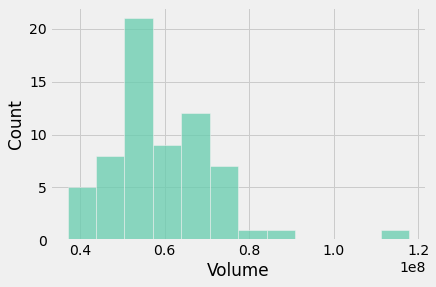

In [213]:
for i in df.columns: #showing the histogram of each column 
  if df[i].dtype != 'object':
    sns.histplot(df, x=i, color=palette[0])
    plt.show()

In [214]:
#to set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date']))
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-11-15,2022-11-15,167.220001,169.979996,163.820007,166.660004,166.660004,54587600
2022-11-16,2022-11-16,161.619995,163.619995,158.729996,159.100006,159.100006,64954700
2022-11-17,2022-11-17,157.149994,162.660004,155.350006,156.770004,156.770004,71089400
2022-11-18,2022-11-18,159.660004,160.020004,151.199997,154.089996,154.089996,49167700
2022-11-21,2022-11-21,151.470001,154.770004,150.800003,153.169998,153.169998,40473900


In [215]:
# Function to calculate the SMA(simple moving average) using the mean
def SMA100(data, period = 100, column ='Close'):
    return data[column].rolling(window=period).mean()

def SMA50(data, period = 50, column ='Close'):
    return data[column].rolling(window=period).mean()

In [216]:
# Function to calculate EMA(exponential moving average) using the mean
def EMA21(data, period = 21, column ='Close'):
    return data[column].ewm(span = period, adjust = False).mean()

def EMA8(data, period = 8, column ='Close'):
    return data[column].ewm(span = period, adjust = False).mean()

In [217]:
# Function to calcuate the MACD(Moving average Convergence/Divergence)
def MACD(data, period_long = 26, period_short = 12, period_signal = 9, column = 'Close'):
    ShortEMA = EMA21(data, period_short, column = column)
    LongEMA = EMA21(data, period_long, column = column)
    data['MACD'] = ShortEMA - LongEMA
    data['Signal_line'] = EMA21(data, period_signal, column = 'MACD')
    return data

In [218]:
'''
Function to calculate the (RSI)relative strength index 
RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ]
'''
def RSI(data, period = 14, column = 'Close'):
    delta = data[column].diff(1)
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = SMA(data, period, column = 'up')
    AVG_Loss = abs(SMA(data, period, column = 'down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0 / (1.0 + RS)) 
    data['RSI'] = RSI 
    return data

In [219]:
# Applying indicators to the dataset 
MACD(df)

RSI(df)

df['SMA100'] = SMA100(df)
df['SMA50'] = SMA50(df)

df['EMA21'] = EMA21(df)
df['EMA8'] = EMA8(df)

In [220]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_line,up,down,RSI,SMA100,SMA50,EMA21,EMA8
Date,,,,,,,,,,,,,,,,
2022-11-15,2022-11-15,167.220001,169.979996,163.820007,166.660004,166.660004,54587600,8.532295,4.794175,3.710007,0.000000,77.688011,NaN,131.907199,142.687833,154.229939
2022-11-16,2022-11-16,161.619995,163.619995,158.729996,159.100006,159.100006,64954700,8.680442,5.571428,0.000000,-7.559998,68.767166,NaN,132.346400,144.179849,155.312176
2022-11-17,2022-11-17,157.149994,162.660004,155.350006,156.770004,156.770004,71089400,8.511721,6.159487,0.000000,-2.330002,63.434907,NaN,132.683800,145.324408,155.636138
2022-11-18,2022-11-18,159.660004,160.020004,151.199997,154.089996,154.089996,49167700,8.068742,6.541338,0.000000,-2.680008,64.079520,NaN,132.888200,146.121280,155.292551
2022-11-21,2022-11-21,151.470001,154.770004,150.800003,153.169998,153.169998,40473900,7.556337,6.744338,0.000000,-0.919998,62.975422,NaN,133.050600,146.762073,154.820873


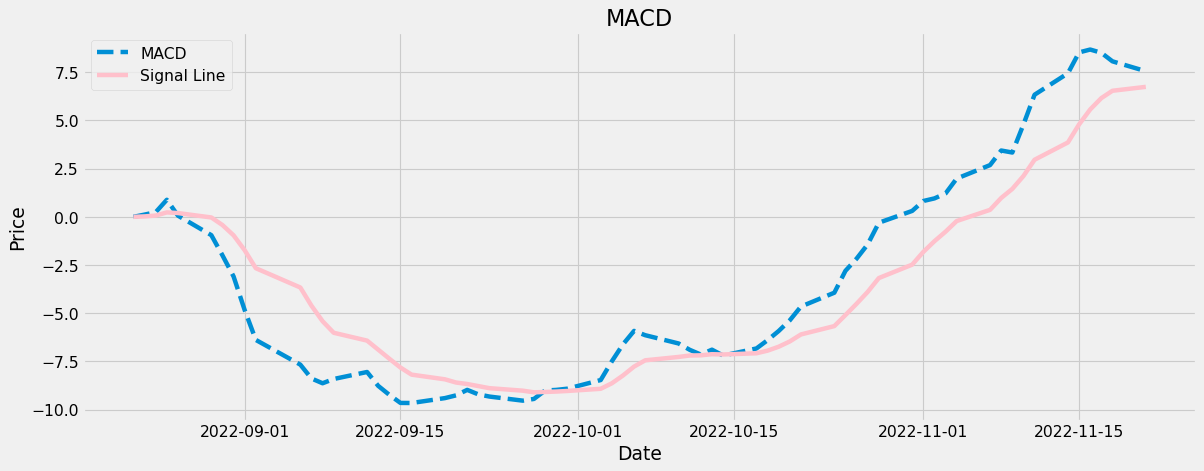

In [221]:
'''
when the two lines crossing, the trend is changing. 
if the MACD blue dashed line under when crossing, it is turning to downtrend
if the MACD blue dashed line is above the signal red line when crossing, then it is uptrend
'''
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(df['MACD'],linestyle = 'dashed')
plt.plot(df['Signal_line'], color = 'pink')
plt.legend(['MACD', 'Signal Line'])
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

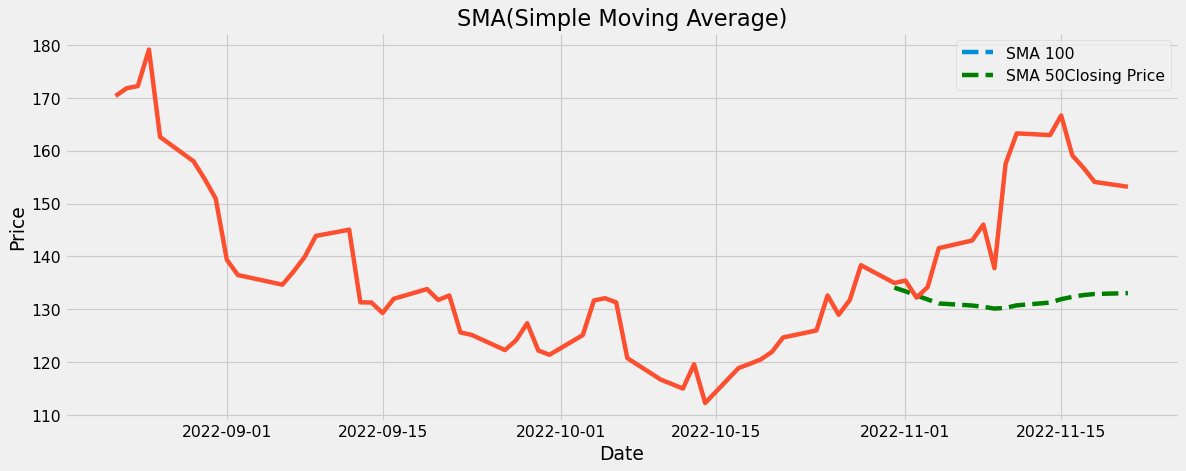

In [222]:
'''
Most SMA(simple moving average) is for swinging or long term holding positions.
since this is only 3 months data, we can see SMA 100
If the market price is above SMA 50, it is uptrend, below is downtrend

When we do yearly data set analyze, day chart on 20 years
Essentially, a bullish crossover (the 50-day MA moving above the 100-day MA) is called a golden cross 
and it signals that a new bullish trend is starting.
'''

plt.figure(figsize=(16, 6), dpi=80)
plt.plot(df['SMA100'],linestyle = 'dashed')
plt.plot(df['SMA50'],color = 'green', linestyle = 'dashed')
plt.plot(df['Close'])
plt.legend(['SMA 100', 'SMA 50' 'Closing Price'])
plt.title('SMA(Simple Moving Average)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

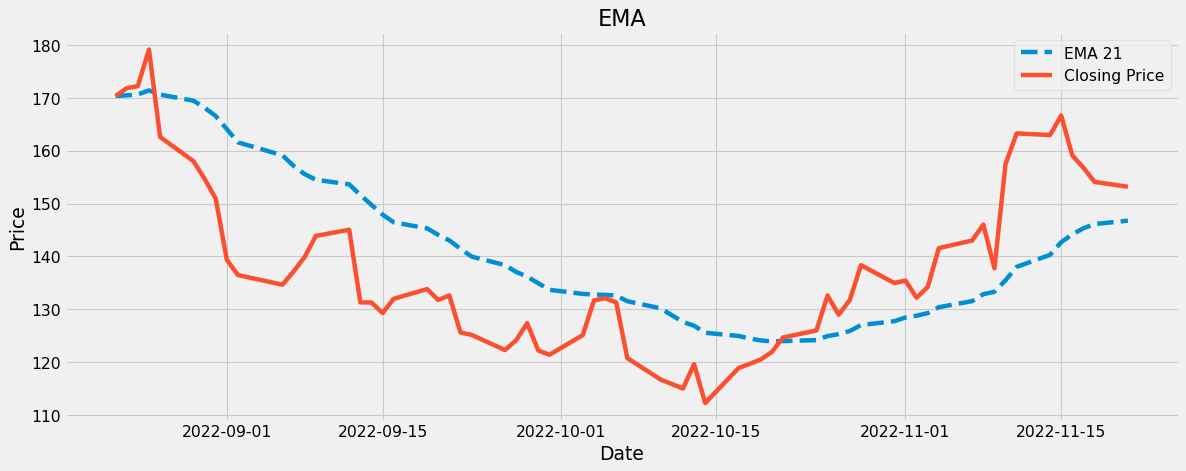

In [223]:
'''
The EMA (exponential moving average) is the dash blue line, the closing stock price is the red line
if the ema under, price line on top,  price line touch the ema line, then it is to buy, 
if the ema is above the price line, and price line touch the ema line, then it is to sell.
-depend on the time interval to know, swing, or daytrade, or long term holding. 
'''

plt.figure(figsize=(16, 6), dpi=80)
plt.plot(df['EMA21'],linestyle = 'dashed')
plt.plot(df['Close'])
plt.legend(['EMA 21', 'Closing Price'])
plt.title('EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

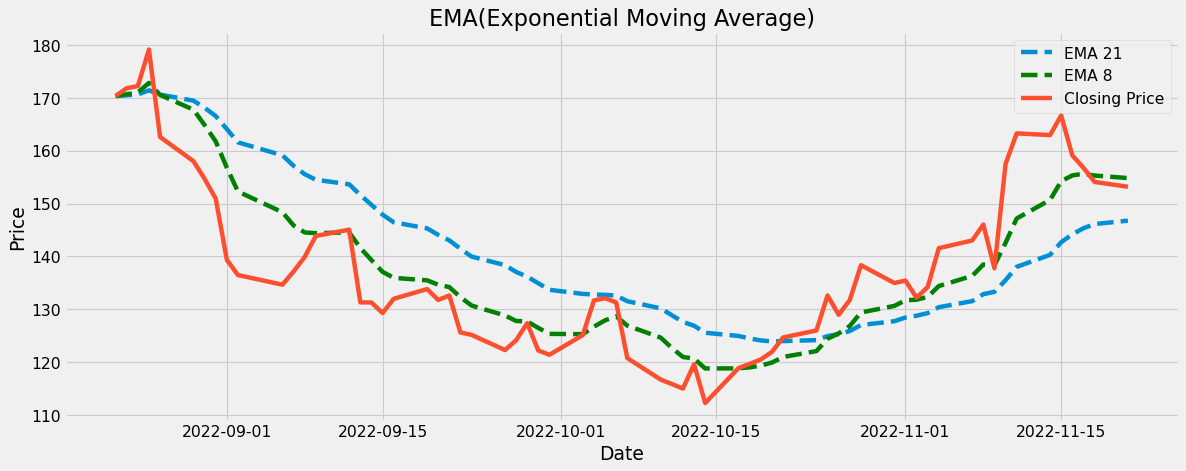

In [224]:
'''
When EMA 21 above of EMA 8, crossing, mean the market is in the downtrend
when EMA 8 above of EMA 21, crossing, means the market is uptrend 
'''

plt.figure(figsize=(16, 6), dpi=80)
plt.plot(df['EMA21'],linestyle = 'dashed')
plt.plot(df['EMA8'],color = 'green', linestyle = 'dashed')
plt.plot(df['Close'])
plt.legend(['EMA 21', 'EMA 8', 'Closing Price'])
plt.title('EMA(Exponential Moving Average)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

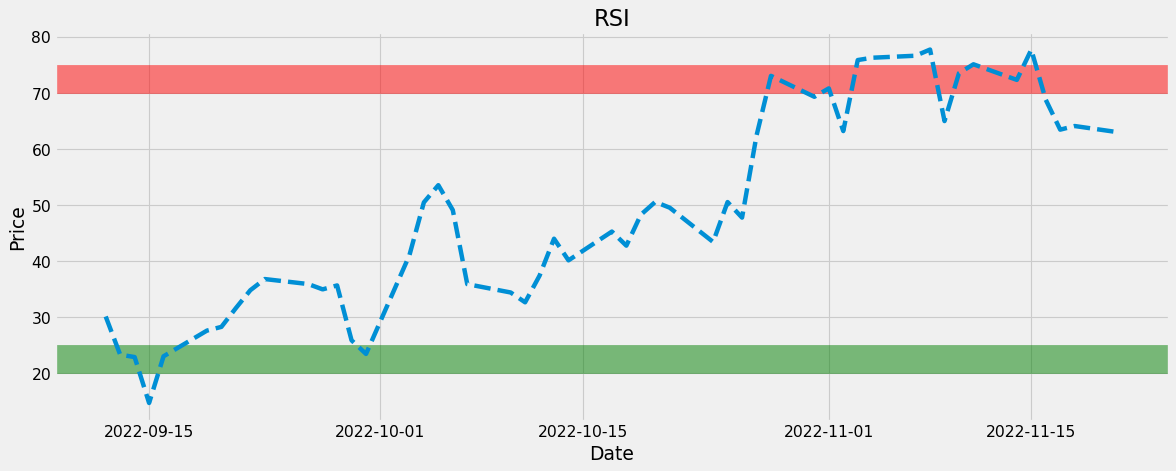

In [225]:
'''
When (RSI)relative strength index hits 20-25 and below, the green color, is to buy, it is over sold 
when hit 70-75 and above, the red color, is to sell, it is over bought 
'''

plt.figure(figsize=(16, 6), dpi=80)
plt.plot(df['RSI'],linestyle = 'dashed')
plt.axhspan(70, 75, color='red', alpha=0.5)
plt.axhspan(20, 25, color='green', alpha=0.5)
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()